In [27]:
import pandas as pd
import networkx as nx
import re
import unidecode
import dask as dd
import numpy as np

In [2]:
RAW_DATA_DIR = "spotify.csv"

In [15]:
#standart read csv won't work, commas are in names!!! 
n = 4 #number of columns
df = pd.read_csv(RAW_DATA_DIR,
                 usecols=range(n),
                 lineterminator='\n',
                 header=None)

df = df[1:] #take the data less the header row
df.columns = ["user_id", "artistname", "trackname", "playlistname"] #set the header row as the df header

In [16]:
#df[['user_id','artistname','trackname','playlistname']] = \
#df[['user_id','artistname','trackname','playlistname']].astype(str)

In [17]:
df = df.sample(frac=0.0005)
df

,user_id,artistname,trackname,playlistname
6138917,3f30047abd0b82240c0861a63e07255a,A Wilhelm Scream,Gut Sick Companion,yeah
10731817,00dd7fde8040db835d917e077bb47e4b,Flying Lotus,Table Tennis ft. Laura Darlington,Starred
9026415,c60f201dc4d4fab977fd1c4de05abb77,The Yesteryears,Lady Madonna,Starred
1946894,57bbb27986bb17abc49416d8312cf343,Marina,"Ah, My Fandorin",Starred
279932,ebbb95f8601b543b74e2ca1977df967e,Rudimental,Waiting All Night (feat. Ella Eyre),Mix
...,...,...,...,...
2988775,818ad63c2be945be06a50c1356bd2692,Signum,Coming On Strong,Aquellos maravillosos años
10554660,1cd4609dcaabf8708a21e96856859aed,Celtas Cortos,Buena Onda,instrumentales Celtas Cortos
4775228,1e411514ef53f64444e069fca58477f9,Glee Cast,True Colors (Glee Cast Version),Höst/Vintermusik
3187982,45b91f2ed9b80c92cacce70e38d87832,Morrissey,Interlude,The Smiths/morrissey


In [18]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    text = remove_emojis(text)
    text = unidecode.unidecode(text)
    text = text.encode('ascii', 'ignore').decode('utf-8')
    return text

In [19]:
# remove non ASCII characters and null characters
u = df.select_dtypes(object)
df[u.columns] = u.apply(
    lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df = df.replace(r'\W+', '', regex=True)

In [20]:
df.groupby("trackname").agg(
    Count=("user_id", "count"),
    
    UsrUniCnt=("user_id", "nunique"),
    UsrRat=("user_id", lambda x: x.nunique()/x.count()),

    ArtUniCnt=("artistname", "nunique"),
    ArtRat=("artistname", lambda x: x.nunique()/x.count()),

    PlyUniCnt=("playlistname", "nunique"),
    PlyRat=("playlistname", lambda x: x.nunique()/x.count()),
)

/tmp/ipykernel_882/3587927400.py:8: RuntimeWarning: invalid value encountered in long_scalars
  ArtRat=("artistname", lambda x: x.nunique()/x.count()),


,Count,UsrUniCnt,UsrRat,ArtUniCnt,ArtRat,PlyUniCnt,PlyRat
trackname,,,,,,,
,5,5,1.0,5,1.0,5,1.0
01Partita1Allemanda,1,1,1.0,1,1.0,1,1.0
03Snakebite,1,1,1.0,0,NaN,1,1.0
04LetTheWindBlowmono,1,1,1.0,0,NaN,1,1.0
04neelix__youre_under_control,1,1,1.0,1,1.0,1,1.0
...,...,...,...,...,...,...,...
stavind,1,1,1.0,1,1.0,1,1.0
themefromthebottom,1,1,1.0,1,1.0,1,1.0
thepalmofyourwavebibioremix,1,1,1.0,1,1.0,1,1.0


In [21]:
df.groupby("artistname").agg(
    Count=("user_id", "count"),
    
    UsrUniCnt=("user_id", "nunique"),
    UsrRat=("user_id", lambda x: x.nunique()/x.count()),

    ArtUniCnt=("artistname", "nunique"),
    ArtRat=("artistname", lambda x: x.nunique()/x.count()),

    PlyUniCnt=("playlistname", "nunique"),
    PlyRat=("playlistname", lambda x: x.nunique()/x.count()),
)

,Count,UsrUniCnt,UsrRat,ArtUniCnt,ArtRat,PlyUniCnt,PlyRat
artistname,,,,,,,
,2,2,1.0,1,0.5,2,1.0
10Years,1,1,1.0,1,1.0,1,1.0
1FishMan,1,1,1.0,1,1.0,1,1.0
2013UrbanStreetz,1,1,1.0,1,1.0,1,1.0
2Chainz,2,2,1.0,1,0.5,2,1.0
...,...,...,...,...,...,...,...
thebirdandthebee,1,1,1.0,1,1.0,1,1.0
theblackkeys,1,1,1.0,1,1.0,1,1.0
tomyboy,1,1,1.0,1,1.0,1,1.0


In [22]:
G=nx.from_pandas_edgelist(df, 'artistname', 'trackname',['playlistname'])

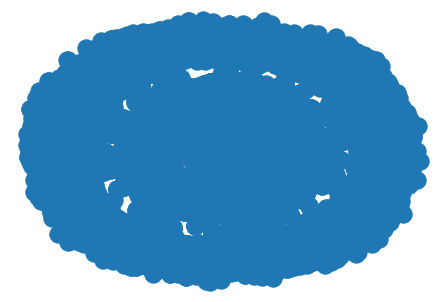

In [23]:
pos = nx.spring_layout(G)
nx.draw(G, pos = pos)

In [25]:
def bigclam(A, X, K, alpha):
    """
    BigCLAM algorithm for community detection with node features and prior.
    A: adjacency matrix of the graph
    X: node feature matrix
    K: number of communities
    alpha: parameter for the prior probability
    """
    N = A.shape[0] # number of nodes
    F = X.shape[1] # number of features

    # initialize community assignments and feature matrices
    c = np.random.randint(0, K, N)
    mu = np.random.rand(K, F)
    sigma = np.random.rand(K, F)
    count = 0
    max_iter = 100
    # E-step
    while True:
        # compute the prior probability
        prior = np.zeros((N, K))
        for k in range(K):
            mask = (c == k)
            prior[:, k] = np.sum(A[:, mask], axis=1) * alpha
        # compute the likelihood
        likelihood = np.zeros((N, K))
        for k in range(K):
            likelihood[:, k] = multivariate_normal.pdf(X, mean=mu[k], cov=sigma[k])
        # compute the total probability
        probability = likelihood * prior
        probability /= np.sum(probability, axis=1, keepdims=True)

        # check for convergence
        new_c = np.argmax(probability, axis=1)
        if np.array_equal(new_c, c):
            break
        c = new_c
        if count == max_iter:
            break
        count +=1
    return c

In [30]:
A = nx.adjacency_matrix(G)

In [31]:
attr_mat = np.array([np.random.rand(3) for node in G.nodes()])
pred = bigclam(A, attr_mat, 3, .05)
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_color=pred)

ValueError: could not broadcast input array from shape (10180,1) into shape (10180,)